# ..Made by Cristiano Dos Anjos..
cristianodosanjos019@gmail.com

...

### Projeto de teste de habilidades da empresa Tractian.

#### Eu tenho o costume de fazer meus projetos em inglês para praticar e ter cada fez mais afinidade com o idioma, recebi o e-mail do teste em inglês então acho que não tem problema fazer do jeito que estou acostumado.

...

### Explaning the data and exposing the case.

The documenthave 20 files .csv that represent the collections of a compressor in a refrigerator. realized by our device "band-aid", with less than 1 minute each collection every hour.

Objectives:
+ First objective is identify patterns.
+ The second objective is make make a algorithm that can automatically calculete how many time the refrigerator was turned on and turned off.
+ the third objective is get analyzing about the condition of our refrigerator, is it unbalanced? Scruffy? What is the condition of it in.

...

### Importing libraries.

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
from sklearn import metrics
from scipy import stats
sns.set_style('whitegrid')

In [56]:
df = pd.read_csv(r'/home/tyrslayer/Documents/Coletas-Geladeira/1589679298-1589679343.csv')

### Exploring and modeling.

In [57]:
df.head(2)

,-8.84,0.97,0.02,38.6
0,-8.81,1.40,-0.49,38.55
1,-8.91,0.72,-1.68,38.65


In [58]:
df2 = df.shift(1)
df3 = df2
df3.head(2)

,-8.84,0.97,0.02,38.6
0,NaN,NaN,NaN,NaN
1,-8.81,1.4,-0.49,38.55


In [59]:
df3.loc[0] = df2.columns

In [60]:
df3.columns = ['x','y', 'z', 'e']

In [61]:
df3 = df3.drop(['e'], axis=1)
df3.dtypes

x    object
y    object
z    object
dtype: object

In [62]:
df3 = df3.astype('float')

In [63]:
df3.dtypes

x    float64
y    float64
z    float64
dtype: object

In [64]:
df3.isnull().sum()

x    0
y    0
z    0
dtype: int64

With the code above we can that our dataset don't have any missing value. Now our data is ready.

## 1# Challenge...

### Analizing to find out patterns.

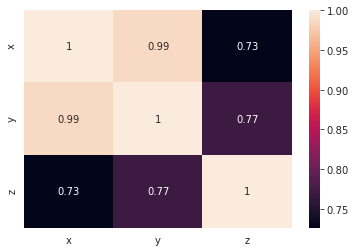

In [65]:
sns.heatmap(df3.corr(), annot=True)
plt.show()

Using a method to find out the correlation at our columns, we got in the columns "x" a very strong correlation with the column "y" reaching 0.99 and moderate strong correlation with the column "z" reaching 0.73. We got in the column "y" a strong correlation with the column "z" reaching 0.77.

Let's see if these correlation is linear or not.

(0.0, 0.4265)

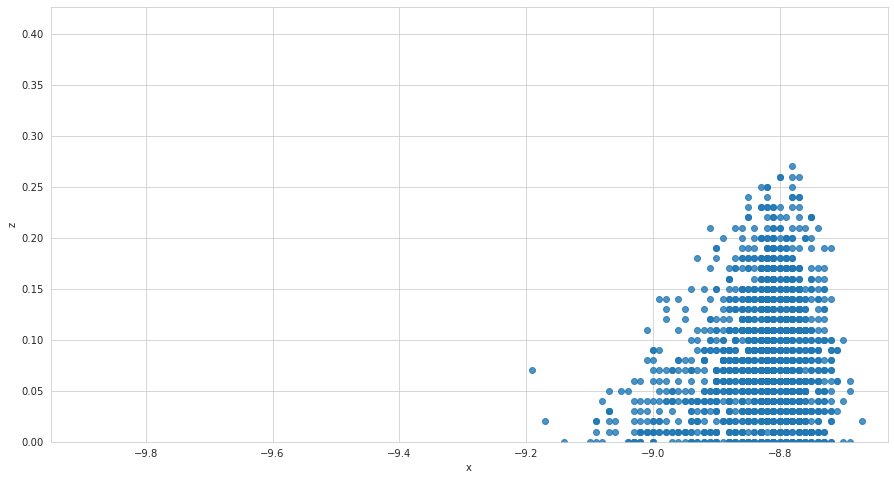

In [66]:
plt.figure(figsize=(15,8))
sns.regplot(x='x', y='z', data=df3)
plt.ylim(0,)

(0.0, 1.891839591278081)

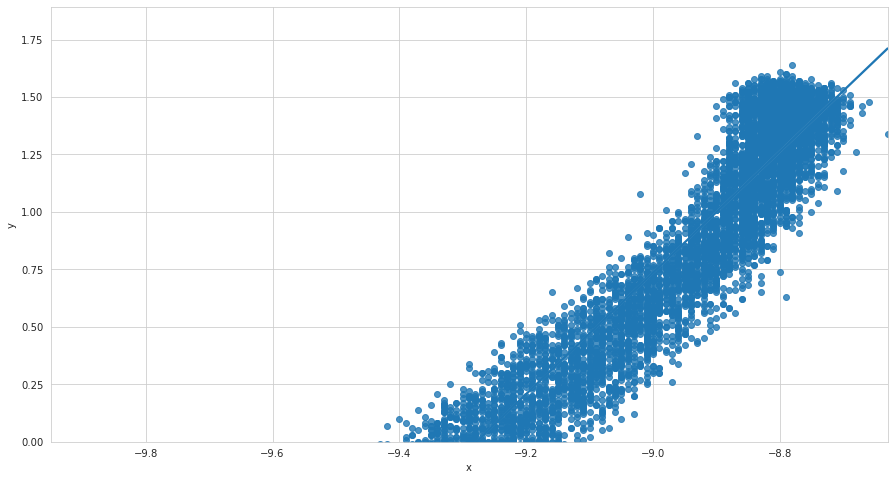

In [67]:
plt.figure(figsize=(15,8))
sns.regplot(x='x', y='y', data=df3)
plt.ylim(0,)

(0.0, 1.8054999999999999)

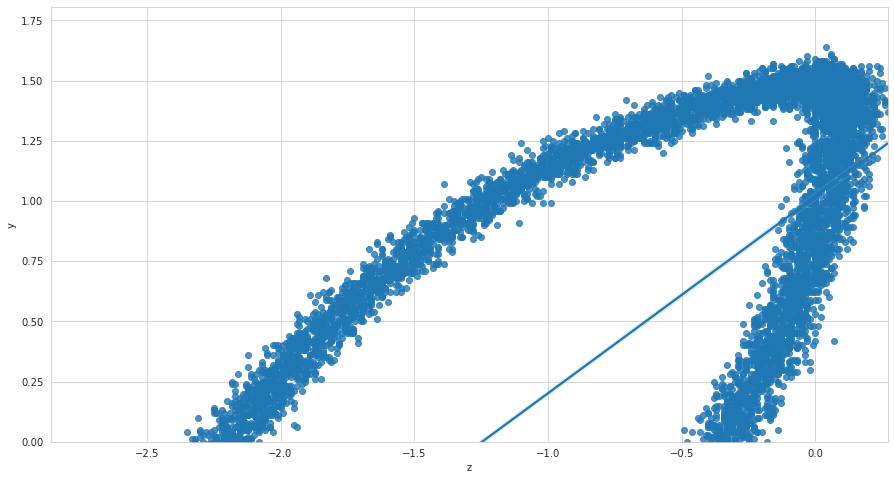

In [68]:
plt.figure(figsize=(15,8))
sns.regplot(x='z', y='y', data=df3)
plt.ylim(0,)

Now we that "x" and "z" haven't any linear corrrelation and if we would make a model of machine learning, we should use the column "y" as the column target with the params of the column "z" and "x".

In [69]:
display(df3)

,x,y,z
0,-8.84,0.97,0.02
1,-8.81,1.40,-0.49
2,-8.91,0.72,-1.68
3,-9.59,-0.79,-2.61
4,-9.85,-1.53,-2.27
...,...,...,...
12721,-9.79,-1.31,-1.62
12722,-9.21,0.15,-0.25
12723,-8.81,1.53,0.15
12724,-8.93,0.96,-1.19


The display above make me curious to know the variace of these columns.

In [70]:
df3['x'].var()

0.15997504487849903

Seeing above we notice that our column 'x' have values a variation of 0.15(or speaking in portuguese 0,15).

In [71]:
df3['y'].var()

1.1423590234283536

With this secund graph we notice that the column 'y' have a variation of 1.14(or speaking in portuguese 1,14).

In [72]:
df3['z'].var()

1.015203339349807

And with the last graph above we notice that the column 'z' have a variation of 1.01(or speaking in portuguese 1,01).

## 1# Goal completed.

...

## 2# Challenge...

As I understand the each file have two time in the name that can be translated, the first time in the name is the time of when the refrigerator was on, and the secund is the time when the refrigerator turned off. Explaning what I understanded, let's get stated.

The following 3 rows of code is to test the slicing of the string that we will use to create the function.

In [73]:
test = '1589679298-1589679343.csv'

In [74]:
test[-14:-4]

'1589679343'

In [75]:
test[-26:-15]

'1589679298'

#### Creating the first algothmn...

In [76]:
#Use our device to see how many times the refrigerator was on, puting the all the name of file between parameters.
def deviceTract_timeOn(data):
    from datetime import datetime
    b = datetime.fromtimestamp(int(data[-14:-4]))
    a = datetime.fromtimestamp(int(data[-26:-15]))
    return b-a

Use the function above with the name of the file in quotes and you will know how much time the refrigerator was turned on.

Let's test our algothmn...

In [77]:
deviceTract_timeOn('1589679298-1589679343.csv')

datetime.timedelta(seconds=45)

As we can see our algothmn is showing that the first refrigerator  was turned on 45 seconds.

#### Creating the secund algothmn...

In [78]:
#Use our device to see how many times the refrigerator was off, puting the all the name of file between parameters.
def deviceTract_timeOff(data1, data2):
    from datetime import datetime
    b = datetime.fromtimestamp(int(data1[-14:-4]))
    c = datetime.fromtimestamp(int(data2[-26:-15]))
    return c-b

Use the function above with the name of the first and the secund file in quotes, and you will know how much time the refrigerator was turned off.

Let's test our algothmn...

In [79]:
deviceTract_timeOff('1589679298-1589679343.csv', '1589682974-1589683028.csv')

datetime.timedelta(seconds=3631)

In [80]:
3631/60

60.516666666666666

With the deviceTract_timeOff we can see that time of the refrigerator was turned off from the first file from the secund was 3631 seconds that is 60 minutes.

## 2# Goal completed.

...

## 3# Challenge...

In [81]:
ff = pd.read_csv(r'/home/tyrslayer/Documents/Coletas-Geladeira/1589682974-1589683028.csv')
ff.head(3)

,-9.76,-1.26,-2.73,36.72
0,-9.85,-1.26,-1.35,36.77
1,-9.34,0.15,-0.11,36.77
2,-8.76,1.54,0.26,36.72


For find out the condition of each refrigerator we should get modeling each data that we will use, so I will create a function to get modeling automacally.

In [82]:
def modelingDataTract(data):
    import pandas as pd
    df = pd.read_csv(data)
    df = df.shift(1)
    df.loc[0] = df.columns
    df.columns = ['x','y', 'z', 'e']
    df = df.drop(['e'], axis=1)
    df = df.astype('float')
    return df

The function its ready.

In [83]:
datatest1 = modelingDataTract(r'/home/tyrslayer/Documents/Coletas-Geladeira/1589682974-1589683028.csv')
datatest1.head(3)

,x,y,z
0,-9.76,-1.26,-2.73
1,-9.85,-1.26,-1.35
2,-9.34,0.15,-0.11


In [84]:
datatest2 = modelingDataTract(r'/home/tyrslayer/Documents/Coletas-Geladeira/1589749293-1589749360.csv')
datatest2.head(3)

,x,y,z
0,-9.58,-0.92,-2.36
1,-9.67,-1.35,-1.72
2,-9.42,-0.38,-0.88


We are going to use the variable 'datatest1' and the variable 'datatest2' to test the condition of the refrigerators, datatest1 is the second file in the folder of files, and the datatest2 is the last file.

...

My idea is create and train a machine learning model and test the metrics in others files, we have 20 files to test it.

As we already now, we should use the column 'y' as dependent variable to create a model of machine learning.

In [85]:
len(df3)

12726

In [86]:
12726/2

6363.0

In [87]:
Train = df3.iloc[-12726:-6363,:]
Test = df3.iloc[-6363:,:]

In [88]:
formula = 'y~x+z'

We will use the model ols to train and test the files.

In [89]:
lm = smf.ols(formula = formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.538e+05
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:07:48   Log-Likelihood:                 2950.0
No. Observations:                6363   AIC:                            -5894.
Df Residuals:                    6360   BIC:                            -5874.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5875      0.061    367.489      0.000      22.467      22.708
x              2.4180      0.007    351.484      0.000       2.404       2.431
z              0.1207      0.003     44.284      0.000       0.115       0.126
==============================================================================
Omnibus:                       32.571   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.677
Skew:                           0.152   Prob(JB):                     1.32e-07
Kurtosis:                       2.836   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see in the line above, our model ols have 98% of R squared. We will use this model for predict and compare the standard deviation and the median of the column 'y' from others files.

In [90]:
print(df3['y'].std(), df3['y'].mean())

1.068811968228441 -0.031362564827911416


In [91]:
pred_datatest1 = lm.predict(datatest1[['x', 'z']])
y_datatest1 = datatest1['y']

In [92]:
metrics.r2_score(y_datatest1, pred_datatest1)

0.9806141480384911

Using our model in the second file of the folder, we received a R-squared of 98%.

In [93]:
print('The standard deviation of the column y is:', y_datatest1.std(ddof=1), ' and the median of the column y is:', y_datatest1.mean())
print('The standard deviation of the column y that was predicted is:', pred_datatest1.std(ddof=1), ' and the median of the column y that was predicted is:', pred_datatest1.mean())

The standard deviation of the column y is: 1.083842588005986  and the median of the column y is: 0.017361132843060543
The standard deviation of the column y that was predicted is: 1.1369732958308392  and the median of the column y that was predicted is: 0.0142411053900801


The values of standard deviation and the median received from the second file are not so far away.

Now let's do it in the last file from the folder...

In [94]:
pred_datatest2 = lm.predict(datatest2[['x', 'z']])
y_datatest2 = datatest2['y']

In [95]:
metrics.r2_score(y_datatest2, pred_datatest2)

0.8558536890489885

In [96]:
print('The standard deviation of the column y is:', y_datatest2.std(ddof=1), ' and the median of the column y is:', y_datatest2.mean())
print('The standard deviation of the column y that was predicted is:', pred_datatest2.std(ddof=1), ' and the median of the column y that was predicted is:', pred_datatest2.mean())

The standard deviation of the column y is: 1.0982206488423516  and the median of the column y is: -0.0058164864441310055
The standard deviation of the column y that was predicted is: 0.7438248301949791  and the median of the column y that was predicted is: -0.13110832975961195


We can see in the lines above that the R-squared is of 85%, I guess this R-squared so less, looking at the last line above we also can see that the last file have a strong difference comparing the standard deviation and the median between the actual and the predicted values.

Let's get comparing other file, from the middle of folder...

In [97]:
datatest3 = modelingDataTract(r'/home/tyrslayer/Documents/Coletas-Geladeira/1589712447-1589712513.csv')
datatest3.head(3)

,x,y,z
0,-10.01,-1.38,-1.70
1,-9.44,-0.37,0.37
2,-8.63,1.33,0.68


Above we can see the teenth file from folder "Coletas-Geladeira" above. We trained the model ols on the first file, then the model was tested on the second file from the folder and we got a percentage of 98% of the R-squared from the actual and predicted values, doing the same thing  on the last file from folder we got a percentage of 85%, we will use the file above to looking for a R-squared of at least less than 92%, if we got this value the refrigerator its scruffy.

In [98]:
pred_datatest3 = lm.predict(datatest3[['x', 'z']])
y_datatest3 = datatest3['y']

In [99]:
metrics.r2_score(y_datatest3, pred_datatest3)

0.8857085772373536

In [100]:
print('The standard deviation of the column y is:', y_datatest3.std(ddof=1), ' and the median of the column y is:', y_datatest3.mean())
print('The standard deviation of the column y that was predicted is:', pred_datatest3.std(ddof=1), ' and the median of the column y that was predicted is:', pred_datatest3.mean())

The standard deviation of the column y is: 1.0830985345683632  and the median of the column y is: 0.007614628820960658
The standard deviation of the column y that was predicted is: 1.3572365599886573  and the median of the column y that was predicted is: 0.005574249655823493


#### Conclusion...

we can notice that the more times the refrigerator is turned off and then turned on it keeps vibrating more and more with distant variations, I think it should vibrate differently but in the end the 'y' column should keep with R-squareds, median and standard deviation similar from the original column 'y'.

## 3# Goal completed.

# *finished challenges*:)